<a href="https://colab.research.google.com/github/SantiagoMendivelso01/DataScience_University/blob/main/Laboratorio_No_supervisado(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

#__Laboratorio. Aprendizaje no supervisado__

## __K-means__

Aplique el algoritmo de k-means a los cuatro conjuntos de datos que se presentan a continuación. Determine la cantidad óptima de grupos en cada caso.

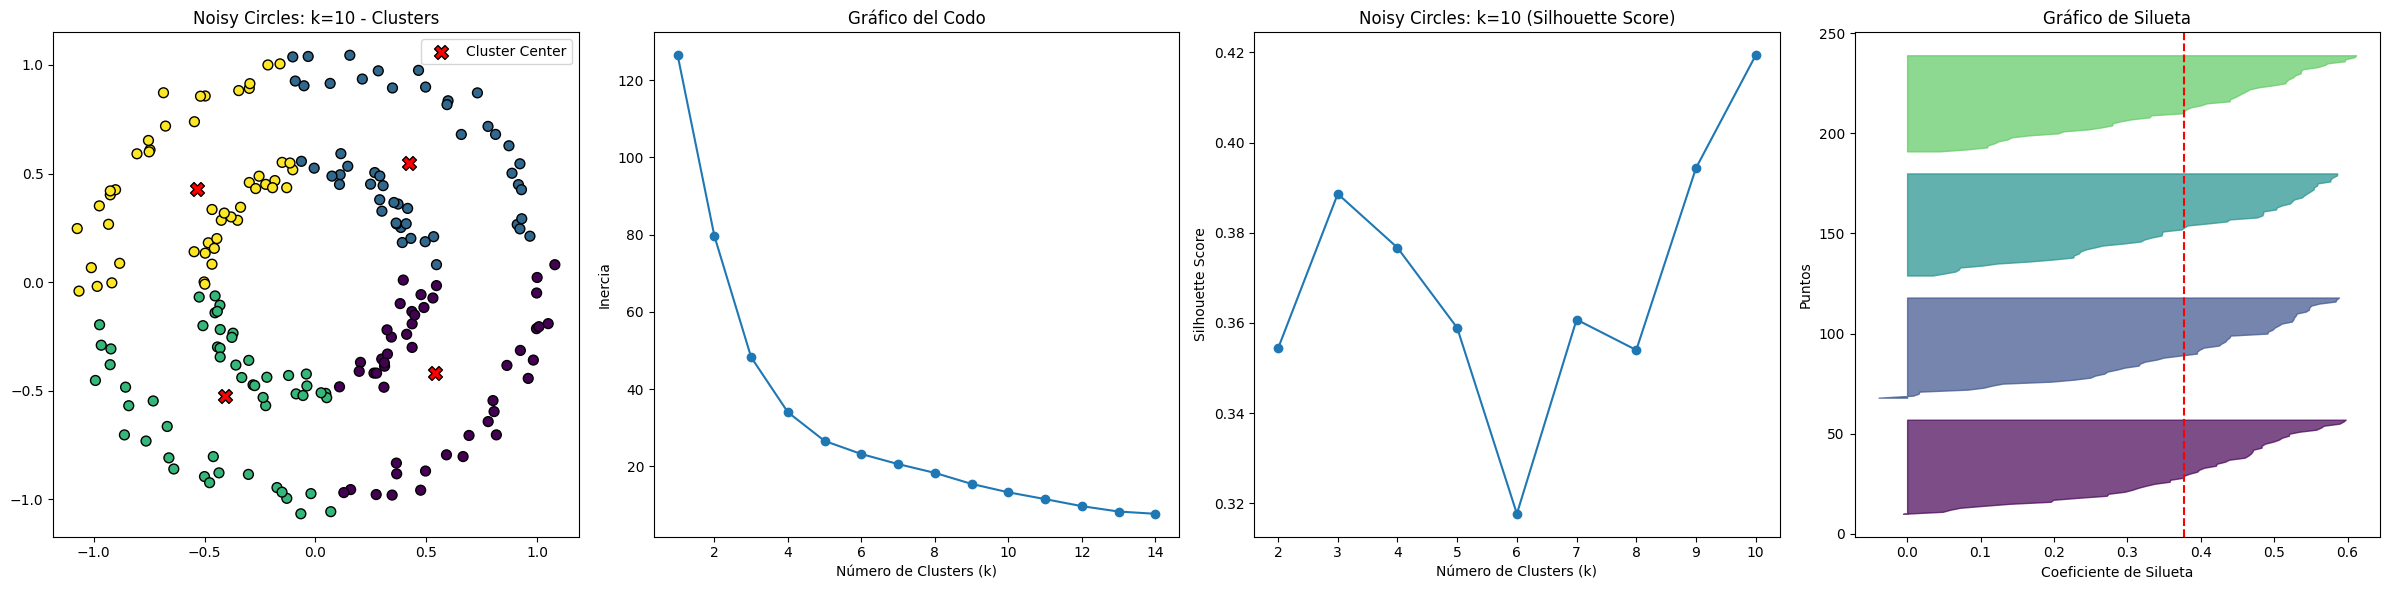

In [11]:
# Generar los datos de noisy_circles
n_samples = 200
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Configuración de k óptimo
k = 4
title = "Noisy Circles: k=10"

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Clusters y Centros
kmeans = KMeans(n_clusters=k, random_state=0).fit(noisy_circles)
labels = kmeans.labels_
scatter = axes[0].scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=labels, cmap='viridis', s=50, edgecolor='black')
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', edgecolor='black', label='Cluster Center')
axes[0].set_title(f"{title} - Clusters")
axes[0].legend()

# Gráfico del Codo
inertia = []
k_range = range(1, 15)
for i in k_range:
    kmeans_tmp = KMeans(n_clusters=i, random_state=0).fit(noisy_circles)
    inertia.append(kmeans_tmp.inertia_)
axes[1].plot(k_range, inertia, marker='o')
axes[1].set_title("Gráfico del Codo")
axes[1].set_xlabel("Número de Clusters (k)")
axes[1].set_ylabel("Inercia")

# Score de Silueta para diferentes valores de k
silhouette_scores = []
k_silhouette_range = range(2, 11)
for i in k_silhouette_range:
    kmeans_tmp = KMeans(n_clusters=i, random_state=0).fit(noisy_circles)
    score = silhouette_score(noisy_circles, kmeans_tmp.labels_)
    silhouette_scores.append(score)
axes[2].plot(k_silhouette_range, silhouette_scores, marker='o')
axes[2].set_title(f"{title} (Silhouette Score)")
axes[2].set_xlabel("Número de Clusters (k)")
axes[2].set_ylabel("Silhouette Score")

# Gráfico de Silueta
silhouette_vals = silhouette_samples(noisy_circles, labels)
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / k)
    axes[3].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
axes[3].axvline(x=silhouette_score(noisy_circles, labels), color="red", linestyle="--")
axes[3].set_title("Gráfico de Silueta")
axes[3].set_xlabel("Coeficiente de Silueta")
axes[3].set_ylabel("Puntos")

plt.tight_layout()
plt.show()


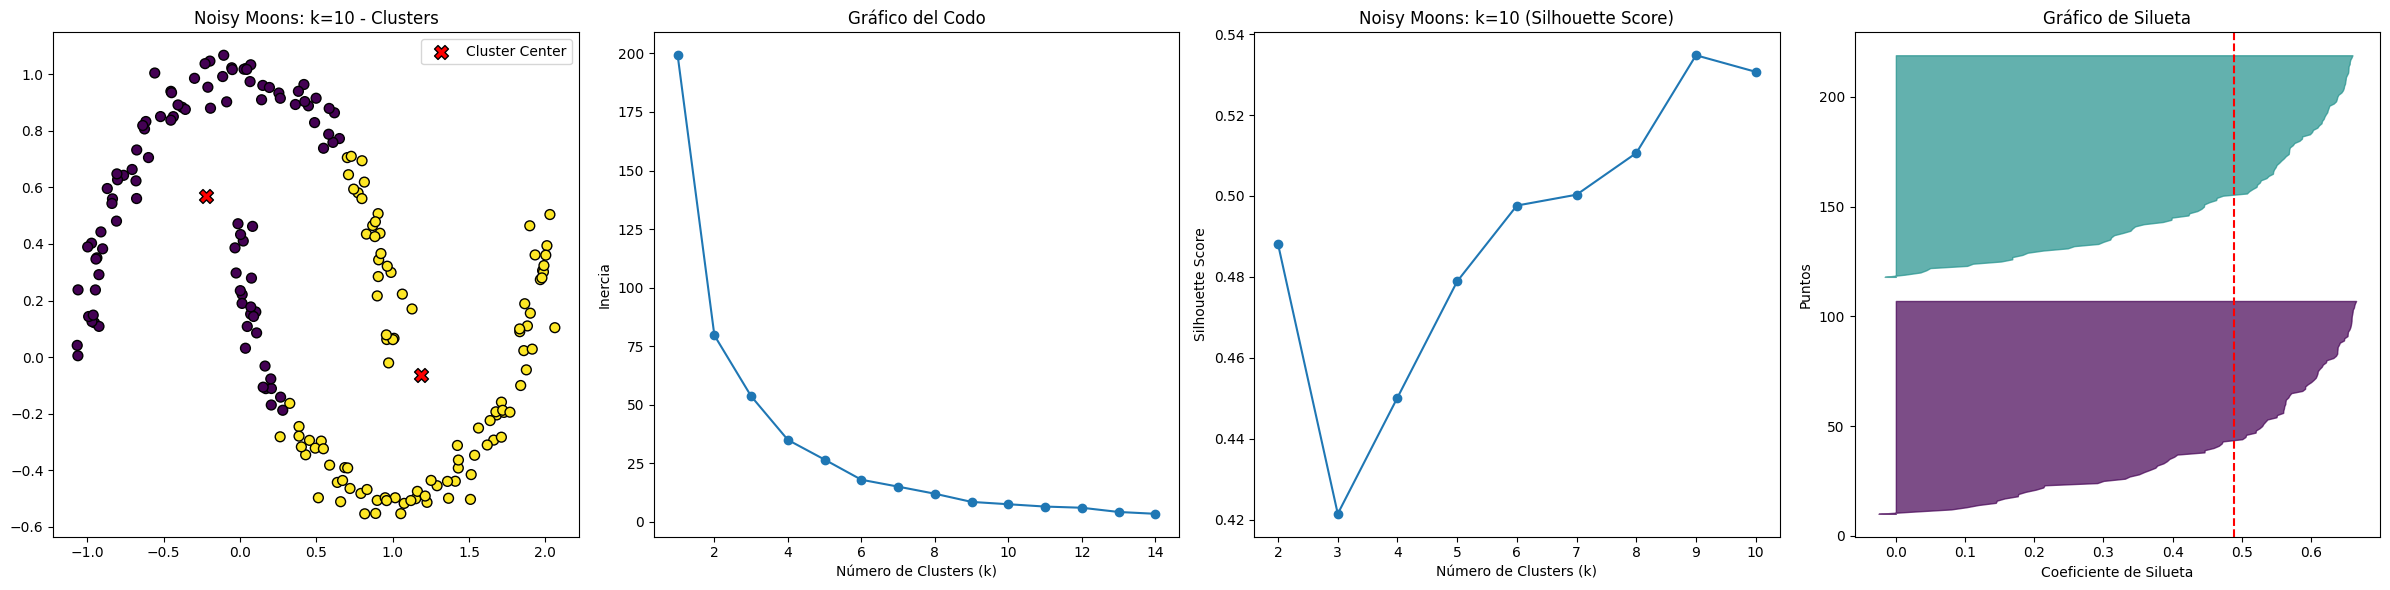

In [13]:
# Generar los datos de noisy_moons
n_samples = 200
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=0.05)

# Configuración de k óptimo
k = 2
title = "Noisy Moons: k=10"

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Clusters y Centros
kmeans = KMeans(n_clusters=k, random_state=0).fit(noisy_moons)
labels = kmeans.labels_
scatter = axes[0].scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=labels, cmap='viridis', s=50, edgecolor='black')
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', edgecolor='black', label='Cluster Center')
axes[0].set_title(f"{title} - Clusters")
axes[0].legend()

# Gráfico del Codo
inertia = []
k_range = range(1, 15)
for i in k_range:
    kmeans_tmp = KMeans(n_clusters=i, random_state=0).fit(noisy_moons)
    inertia.append(kmeans_tmp.inertia_)
axes[1].plot(k_range, inertia, marker='o')
axes[1].set_title("Gráfico del Codo")
axes[1].set_xlabel("Número de Clusters (k)")
axes[1].set_ylabel("Inercia")

# Score de Silueta para diferentes valores de k
silhouette_scores = []
k_silhouette_range = range(2, 11)
for i in k_silhouette_range:
    kmeans_tmp = KMeans(n_clusters=i, random_state=0).fit(noisy_moons)
    score = silhouette_score(noisy_moons, kmeans_tmp.labels_)
    silhouette_scores.append(score)
axes[2].plot(k_silhouette_range, silhouette_scores, marker='o')
axes[2].set_title(f"{title} (Silhouette Score)")
axes[2].set_xlabel("Número de Clusters (k)")
axes[2].set_ylabel("Silhouette Score")

# Gráfico de Silueta
silhouette_vals = silhouette_samples(noisy_moons, labels)
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / k)
    axes[3].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
axes[3].axvline(x=silhouette_score(noisy_moons, labels), color="red", linestyle="--")
axes[3].set_title("Gráfico de Silueta")
axes[3].set_xlabel("Coeficiente de Silueta")
axes[3].set_ylabel("Puntos")

plt.tight_layout()
plt.show()


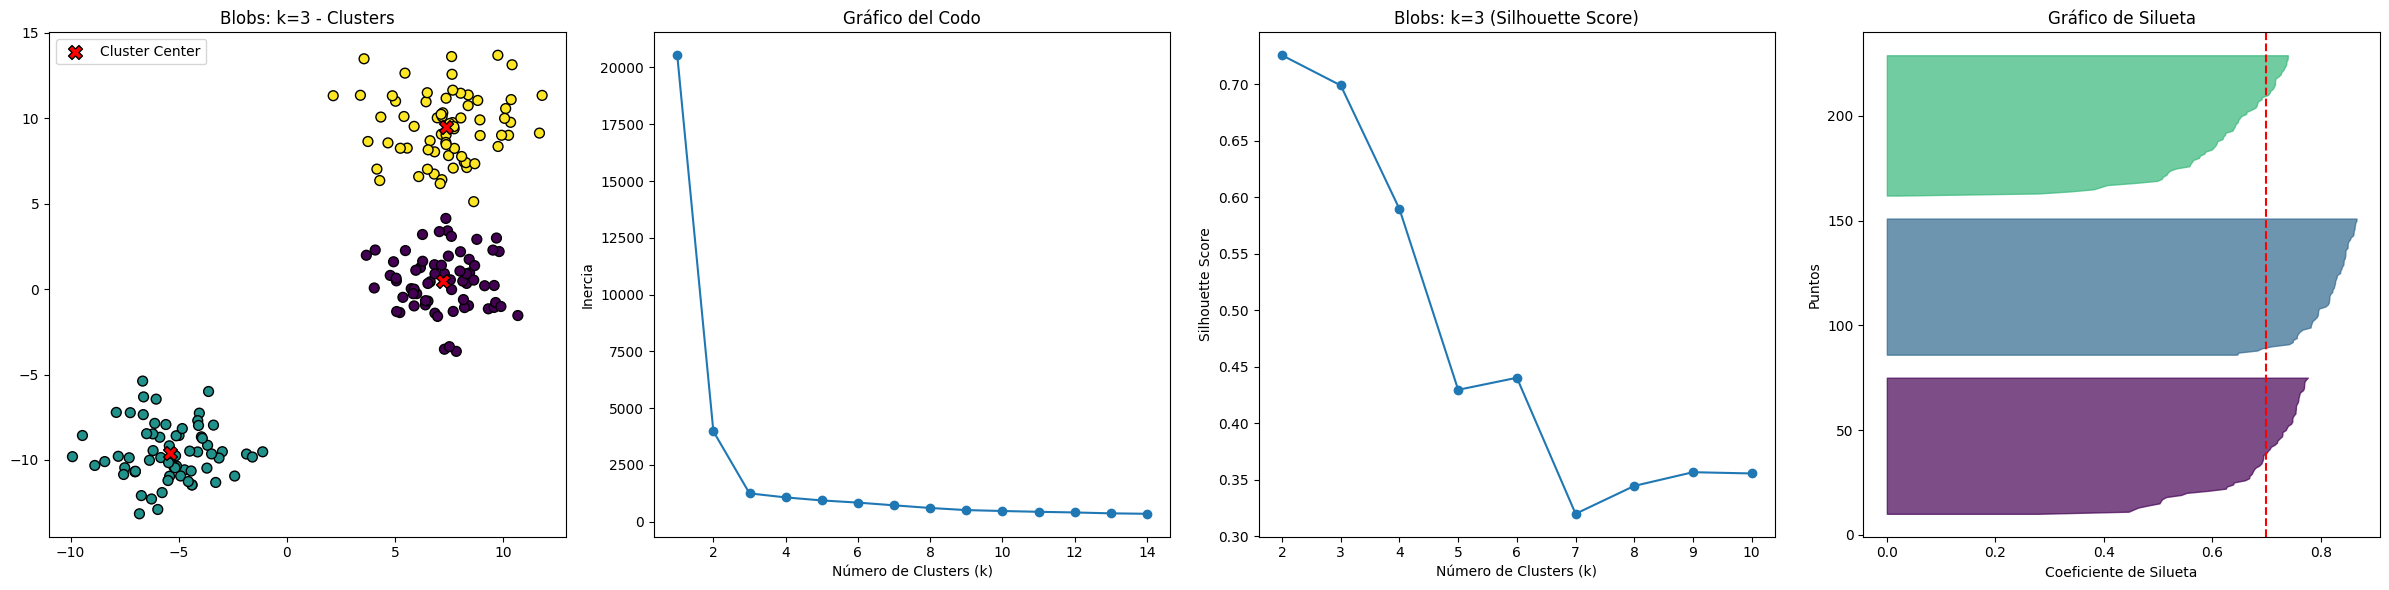

In [9]:
# Generar los datos de blobs
n_samples = 200
blobs, _ = datasets.make_blobs(n_samples=n_samples, cluster_std=1.7, random_state=8)

# Configuración de k óptimo
k = 3
title = "Blobs: k=3"

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Clusters y Centros
kmeans = KMeans(n_clusters=k, random_state=0).fit(blobs)
labels = kmeans.labels_
scatter = axes[0].scatter(blobs[:, 0], blobs[:, 1], c=labels, cmap='viridis', s=50, edgecolor='black')
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', edgecolor='black', label='Cluster Center')
axes[0].set_title(f"{title} - Clusters")
axes[0].legend()

# Gráfico del Codo
inertia = []
k_range = range(1, 15)
for i in k_range:
    kmeans_tmp = KMeans(n_clusters=i, random_state=0).fit(blobs)
    inertia.append(kmeans_tmp.inertia_)
axes[1].plot(k_range, inertia, marker='o')
axes[1].set_title("Gráfico del Codo")
axes[1].set_xlabel("Número de Clusters (k)")
axes[1].set_ylabel("Inercia")

# Score de Silueta para diferentes valores de k
silhouette_scores = []
k_silhouette_range = range(2, 11)
for i in k_silhouette_range:
    kmeans_tmp = KMeans(n_clusters=i, random_state=0).fit(blobs)
    score = silhouette_score(blobs, kmeans_tmp.labels_)
    silhouette_scores.append(score)
axes[2].plot(k_silhouette_range, silhouette_scores, marker='o')
axes[2].set_title(f"{title} (Silhouette Score)")
axes[2].set_xlabel("Número de Clusters (k)")
axes[2].set_ylabel("Silhouette Score")

# Gráfico de Silueta
silhouette_vals = silhouette_samples(blobs, labels)
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / k)
    axes[3].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
axes[3].axvline(x=silhouette_score(blobs, labels), color="red", linestyle="--")
axes[3].set_title("Gráfico de Silueta")
axes[3].set_xlabel("Coeficiente de Silueta")
axes[3].set_ylabel("Puntos")

plt.tight_layout()
plt.show()


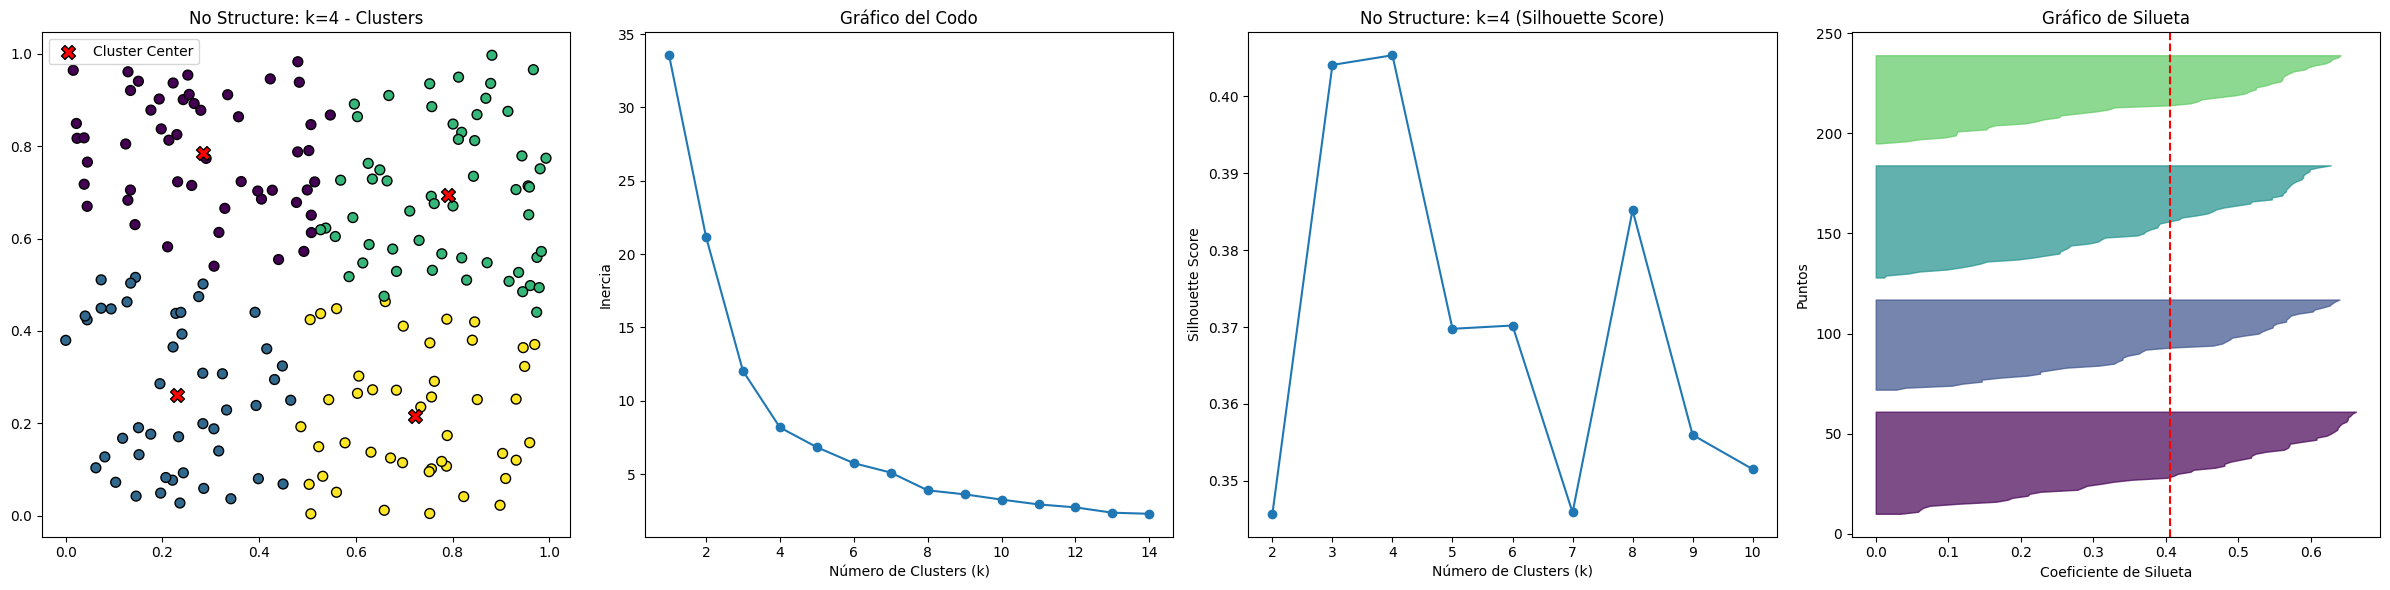

In [10]:
# Generar los datos de no_structure
n_samples = 200
no_structure = np.random.rand(n_samples, 2)

# Configuración de k óptimo
k = 4
title = "No Structure: k=4"

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Clusters y Centros
kmeans = KMeans(n_clusters=k, random_state=0).fit(no_structure)
labels = kmeans.labels_
scatter = axes[0].scatter(no_structure[:, 0], no_structure[:, 1], c=labels, cmap='viridis', s=50, edgecolor='black')
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', edgecolor='black', label='Cluster Center')
axes[0].set_title(f"{title} - Clusters")
axes[0].legend()

# Gráfico del Codo
inertia = []
k_range = range(1, 15)
for i in k_range:
    kmeans_tmp = KMeans(n_clusters=i, random_state=0).fit(no_structure)
    inertia.append(kmeans_tmp.inertia_)
axes[1].plot(k_range, inertia, marker='o')
axes[1].set_title("Gráfico del Codo")
axes[1].set_xlabel("Número de Clusters (k)")
axes[1].set_ylabel("Inercia")

# Score de Silueta para diferentes valores de k
silhouette_scores = []
k_silhouette_range = range(2, 11)
for i in k_silhouette_range:
    kmeans_tmp = KMeans(n_clusters=i, random_state=0).fit(no_structure)
    score = silhouette_score(no_structure, kmeans_tmp.labels_)
    silhouette_scores.append(score)
axes[2].plot(k_silhouette_range, silhouette_scores, marker='o')
axes[2].set_title(f"{title} (Silhouette Score)")
axes[2].set_xlabel("Número de Clusters (k)")
axes[2].set_ylabel("Silhouette Score")

# Gráfico de Silueta
silhouette_vals = silhouette_samples(no_structure, labels)
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / k)
    axes[3].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
axes[3].axvline(x=silhouette_score(no_structure, labels), color="red", linestyle="--")
axes[3].set_title("Gráfico de Silueta")
axes[3].set_xlabel("Coeficiente de Silueta")
axes[3].set_ylabel("Puntos")

plt.tight_layout()
plt.show()



## __Agrupando imagenes__
Utilice el algoritmo de k-means para intentar agrupar las imágenes por
individuos. Experimente con diferente número de grupos y visualice los valores de las clases así como los centroides. ¿Qué se puede concluir a partir de los resultados?. La información completa de conjunto de datos disponible en [fetch_olivetti_faces](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

In [21]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
olivetti_faces = fetch_olivetti_faces()
olivetti_faces.images.shape

(400, 64, 64)

(64, 64) 0.7231405


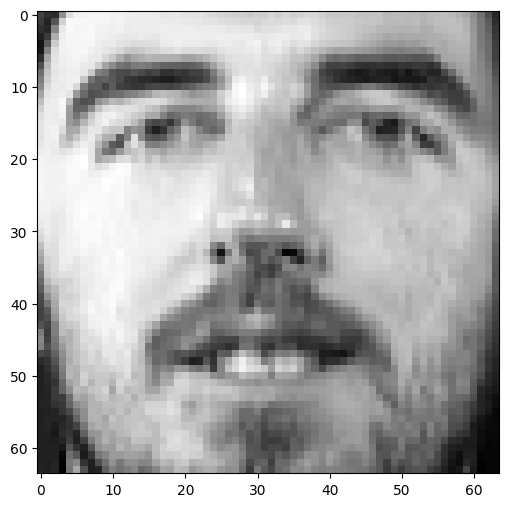

In [22]:
image = olivetti_faces.images[100]
print(image.shape, image[0, 31])
plt.figure(figsize=(6,6))
plt.imshow(image, 'gray')

In [23]:
print(image)

[[0.2892562  0.23966943 0.22727273 ... 0.43801653 0.33471075 0.2107438 ]
 [0.2768595  0.20247933 0.35123968 ... 0.45454547 0.37190083 0.23140496]
 [0.23966943 0.2107438  0.5        ... 0.46280992 0.39256197 0.2520661 ]
 ...
 [0.19008264 0.19421488 0.19008264 ... 0.10743801 0.11157025 0.11157025]
 [0.19421488 0.18595041 0.1983471  ... 0.09917355 0.10743801 0.11157025]
 [0.1983471  0.18595041 0.20661157 ... 0.09504132 0.10743801 0.11157025]]


In [24]:
image.flatten().shape

(4096,)

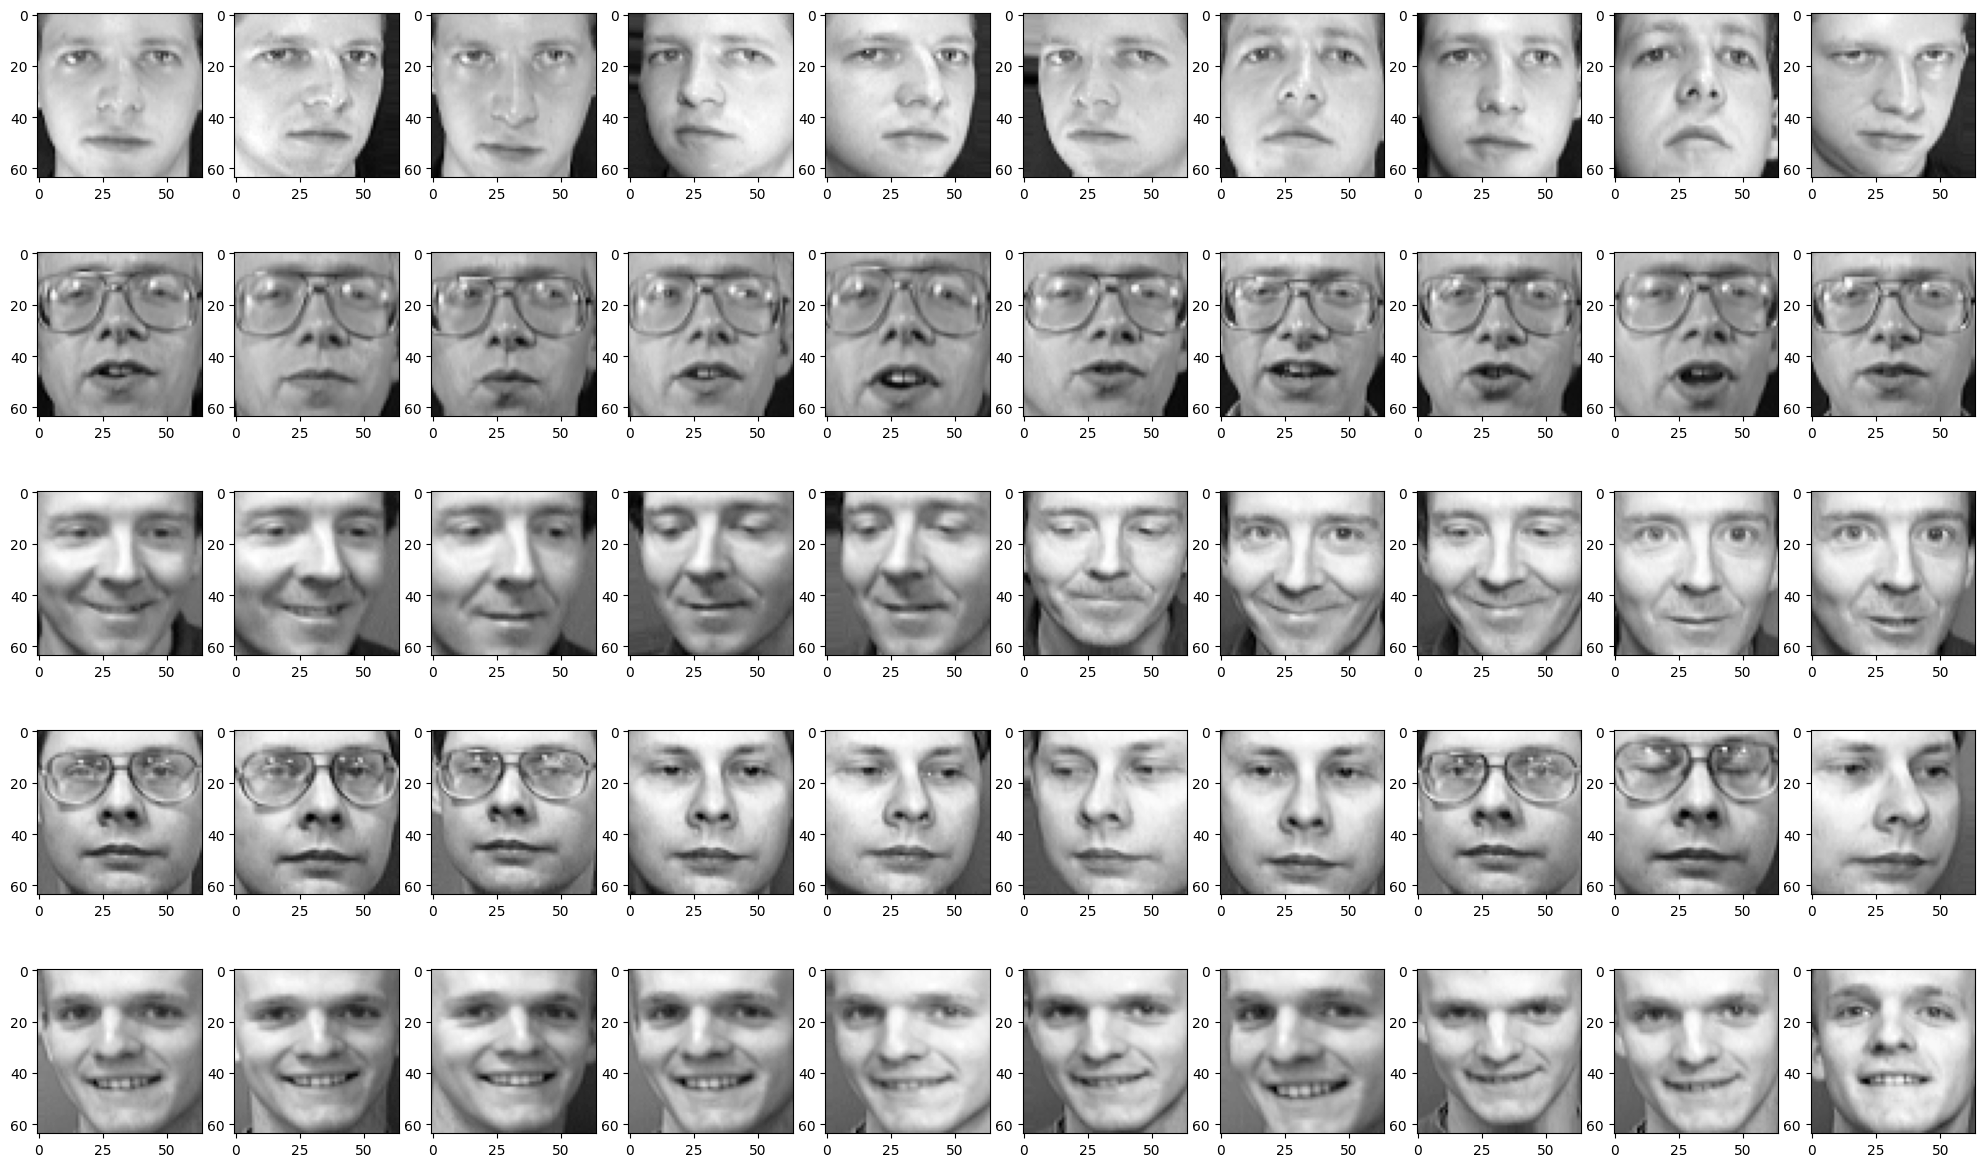

In [26]:
rows = 5
columns = 10
fig, axes = plt.subplots(rows, columns, figsize=(25, 15))
index = 0
for i in range(rows):
  for j in range(columns):
    axes[i][j].imshow(olivetti_faces.images[index], 'gray')
    index += 1

In [27]:
faces = pd.DataFrame(olivetti_faces.data)
faces['target'] = olivetti_faces.target
faces.head(20)

0         1         2         3         4         5         6  \
0   0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1   0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2   0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3   0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4   0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
5   0.549587  0.545455  0.541322  0.537190  0.537190  0.533058  0.528926   
6   0.330579  0.305785  0.330579  0.351240  0.425620  0.500000  0.603306   
7   0.128099  0.185950  0.247934  0.314050  0.388430  0.462810  0.520661   
8   0.243802  0.297521  0.367769  0.454545  0.495868  0.537190  0.578512   
9   0.380165  0.442149  0.483471  0.545455  0.582645  0.628099  0.648760   
10  0.541322  0.586777  0.640496  0.661157  0.685950  0.685950  0.690083   
11  0.644628  0.690083  0.702479  0.702479  0.706612  0.719008  0.727273   
12  0.657025  0.677686  0.698347  0.706612  0.702479  0.710744  0.702479   
13  0.628099  0.644628  0.673554  0.698347  0.698347  0.698347  0.677686   
14  0.636364  0.652893  0.669421  0.677686  0.685950  0.702479  0.698347   
15  0.669421  0.681818  0.706612  0.714876  0.719008  0.727273  0.727273   
16  0.628099  0.603306  0.628099  0.723140  0.702479  0.694215  0.698347   
17  0.586777  0.595041  0.681818  0.694215  0.714876  0.698347  0.714876   
18  0.681818  0.706612  0.719008  0.710744  0.714876  0.727273  0.735537   
19  0.566116  0.619835  0.657025  0.690083  0.702479  0.714876  0.702479   

           7         8         9  ...      4087      4088      4089      4090  \
0   0.677686  0.690083  0.685950  ...  0.669421  0.652893  0.661157  0.475207   
1   0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2   0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3   0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4   0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   
5   0.533058  0.590909  0.611570  ...  0.619835  0.623967  0.615702  0.661157   
6   0.632231  0.644628  0.644628  ...  0.541322  0.541322  0.524793  0.537190   
7   0.557851  0.590909  0.623967  ...  0.157025  0.165289  0.148760  0.157025   
8   0.603306  0.611570  0.632231  ...  0.669421  0.537190  0.235537  0.169421   
9   0.677686  0.690083  0.710744  ...  0.157025  0.165289  0.148760  0.165289   
10  0.698347  0.694215  0.690083  ...  0.483471  0.495868  0.512397  0.528926   
11  0.739669  0.719008  0.719008  ...  0.495868  0.297521  0.074380  0.099174   
12  0.681818  0.681818  0.714876  ...  0.483471  0.280992  0.082645  0.115702   
13  0.690083  0.652893  0.640496  ...  0.119835  0.107438  0.115702  0.103306   
14  0.702479  0.714876  0.710744  ...  0.504132  0.487603  0.479339  0.347107   
15  0.735537  0.727273  0.719008  ...  0.074380  0.115702  0.115702  0.111570   
16  0.714876  0.735537  0.743802  ...  0.413223  0.144628  0.173554  0.322314   
17  0.727273  0.743802  0.739669  ...  0.380165  0.400826  0.330579  0.148760   
18  0.739669  0.735537  0.727273  ...  0.103306  0.111570  0.115702  0.111570   
19  0.702479  0.723140  0.681818  ...  0.483471  0.500000  0.483471  0.177686   

        4091      4092      4093      4094      4095  target  
0   0.132231  0.148760  0.152893  0.161157  0.157025       0  
1   0.152893  0.152893  0.152893  0.152893  0.152893       0  
2   0.148760  0.144628  0.140496  0.148760  0.152893       0  
3   0.743802  0.764463  0.752066  0.752066  0.739669       0  
4   0.177686  0.177686  0.177686  0.173554  0.173554       0  
5   0.661157  0.690083  0.714876  0.706612  0.702479       0  
6   0.487603  0.190083  0.144628  0.152893  0.152893       0  
7   0.157025  0.152893  0.152893  0.173554  0.173554       0  
8   0.177686  0.190083  0.190083  0.181818  0.190083       0  
9   0.173554  0.173554  0.173554  0.173554  0.173554       0  
10  0.363636  0.111

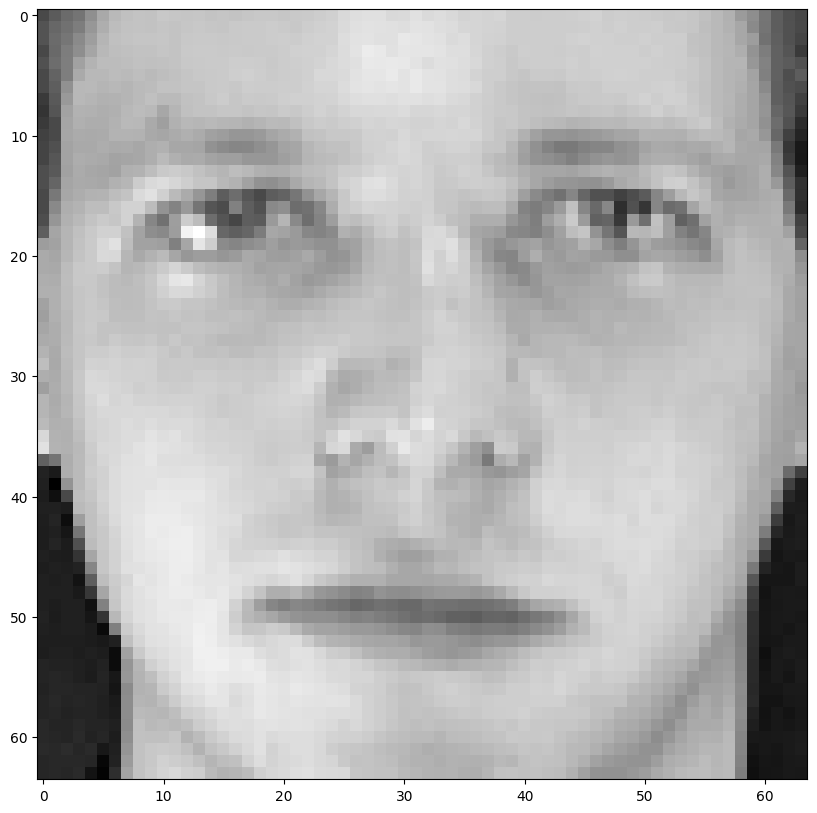

In [28]:
plt.figure(figsize=(10,10))
image2 = olivetti_faces.data[0].reshape(64, 64)
plt.imshow(image2, 'gray')

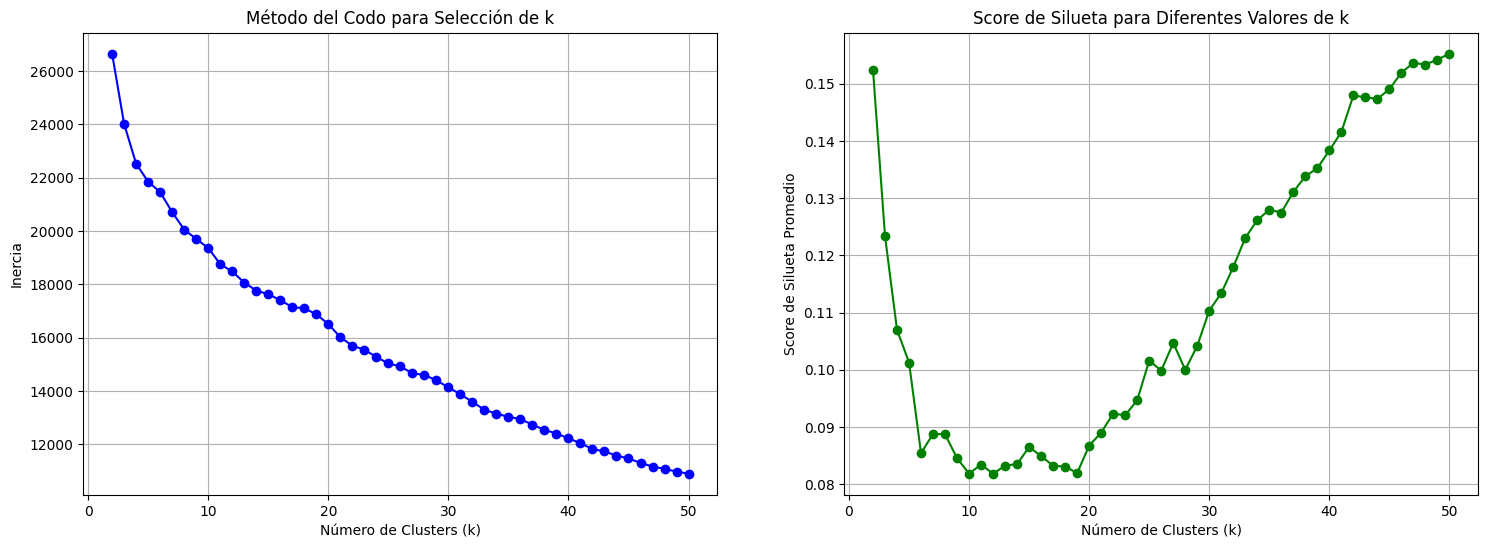

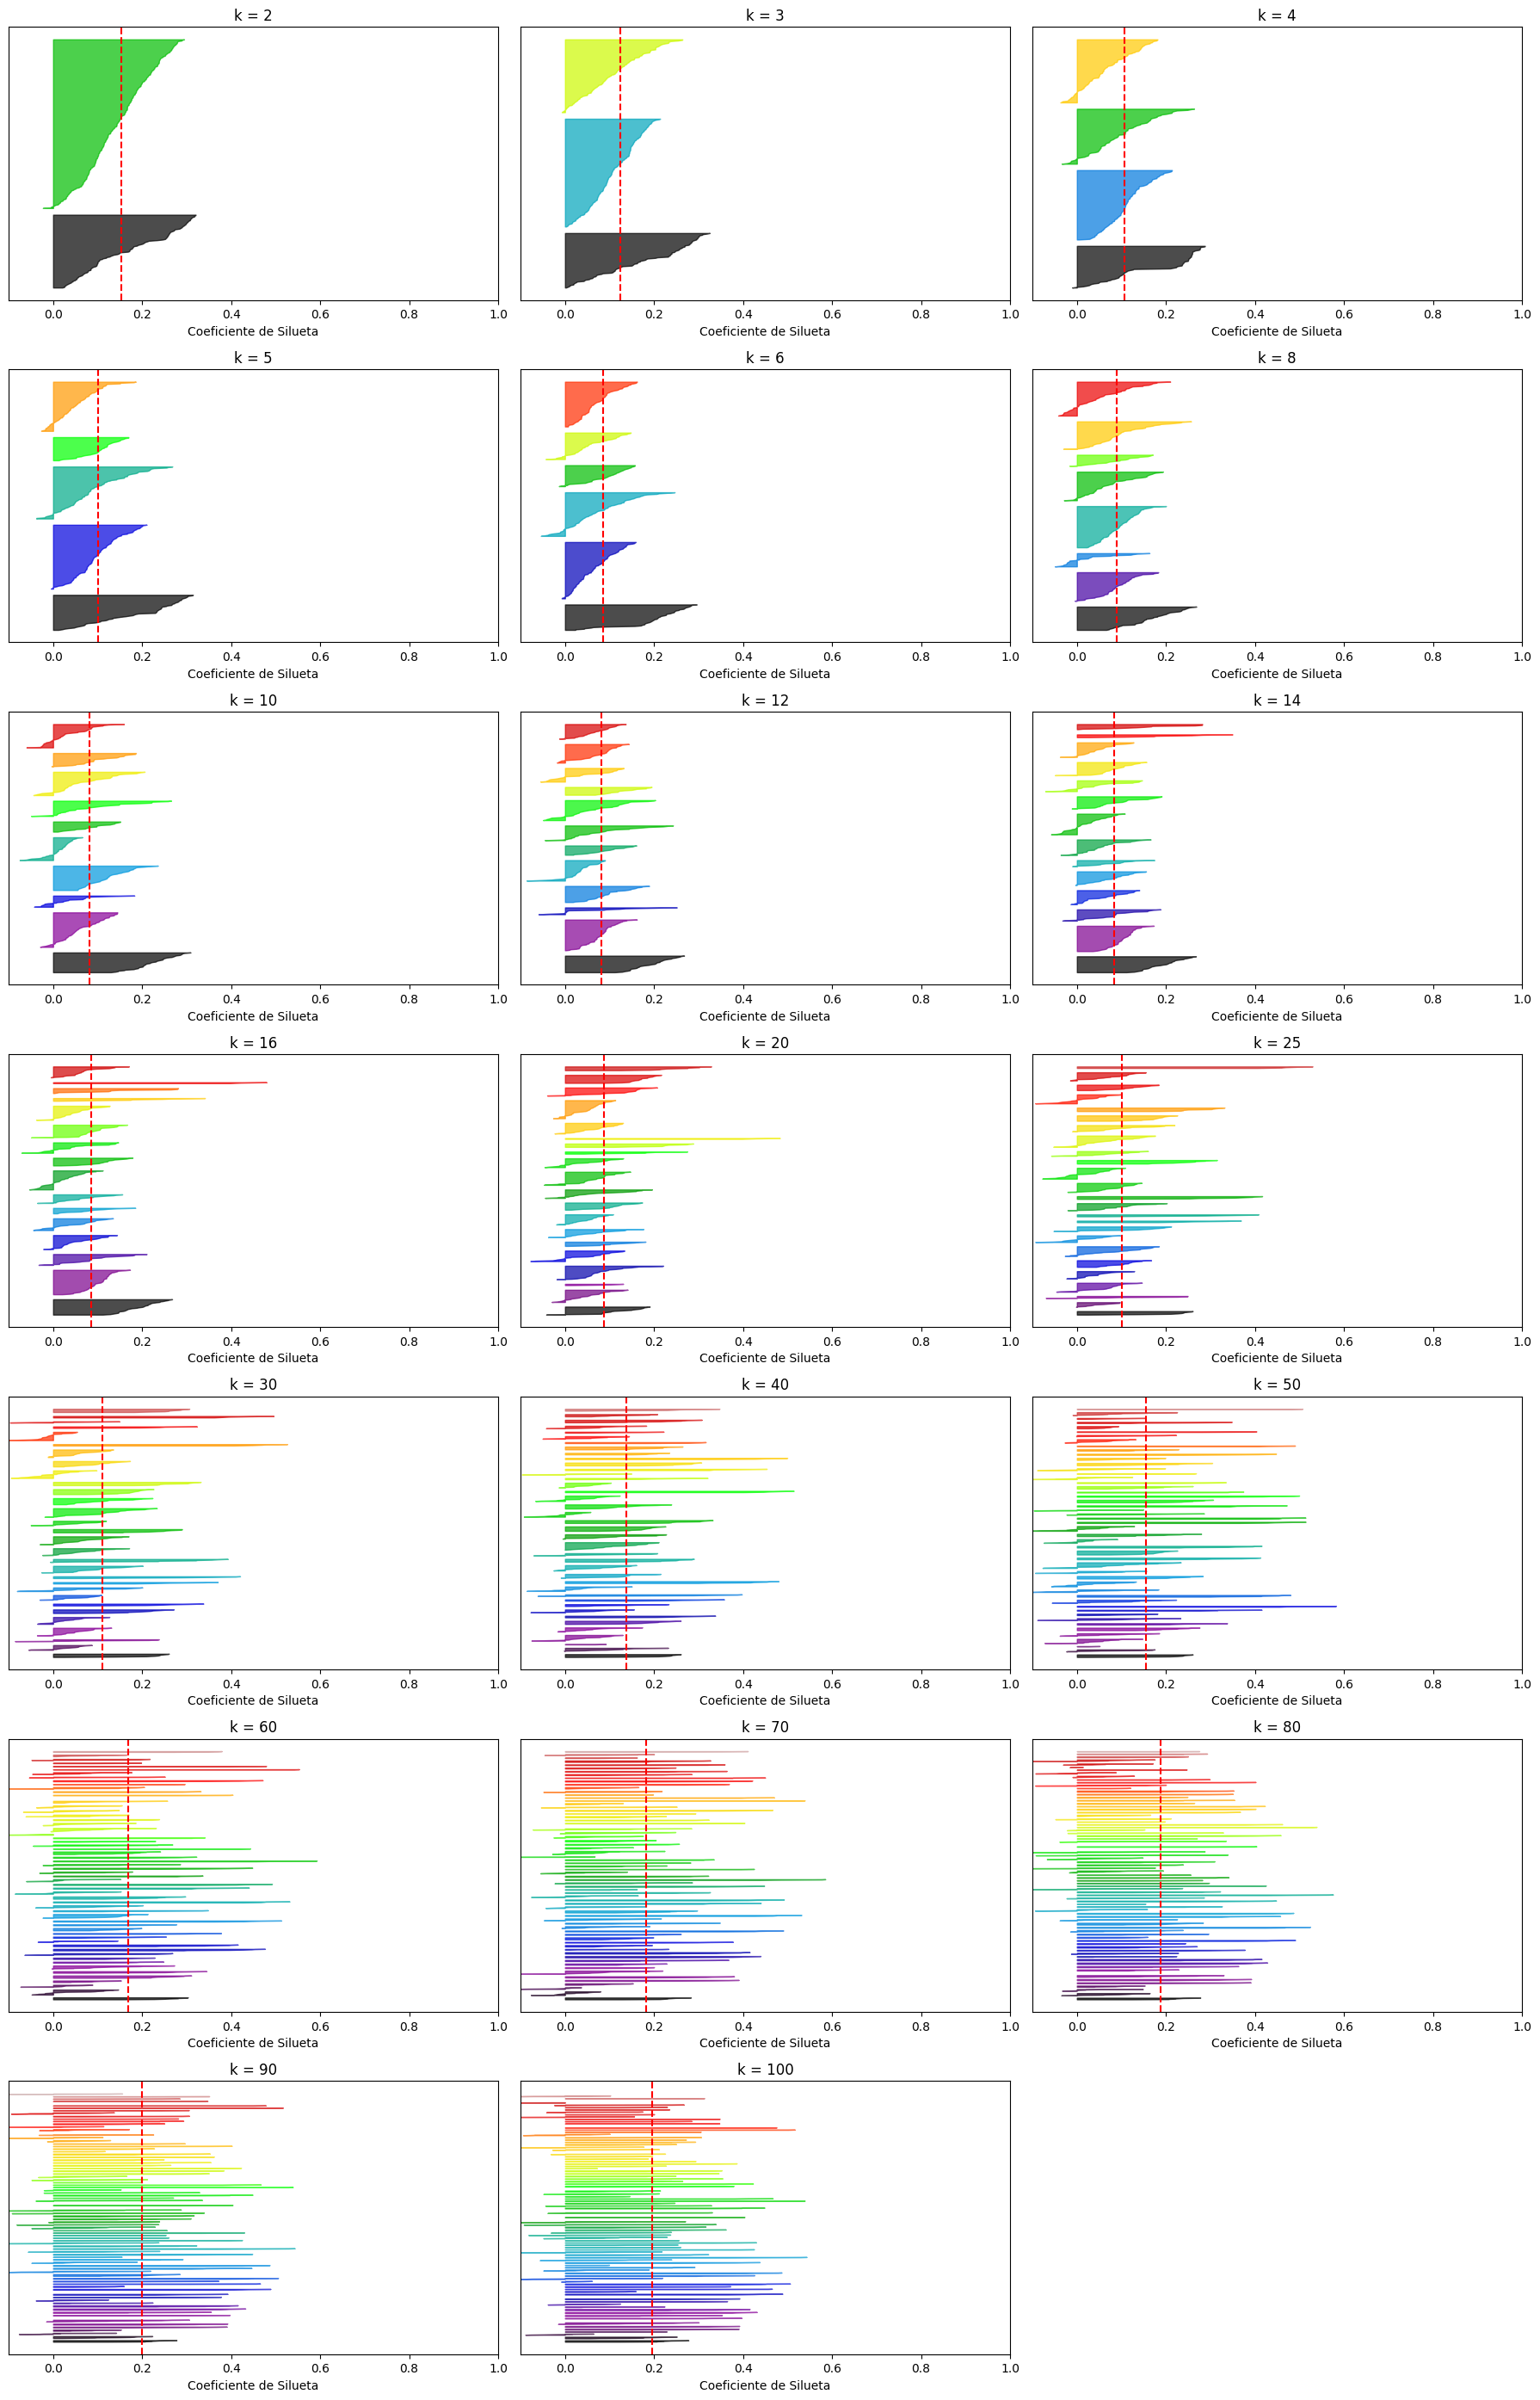

In [29]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.cm as cm

# Asumimos que `olivetti_faces.data` es el conjunto de datos de las imágenes
data = olivetti_faces.data

# Configuración para almacenar la inercia y los puntajes de silueta
inertia = []
silhouette_avg_scores = []
k_values = range(2, 51)  # Inicia en 2 para evitar k=1 en la silueta

# Calcular K-means y puntajes de silueta para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

    # Calcular puntaje de silueta solo para k > 1
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_avg_scores.append(silhouette_avg)

# Gráfico del Codo y Score de Silueta en el mismo conjunto de figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico del Codo
ax1.plot(k_values, inertia, marker='o', color='b', label='Inercia')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia')
ax1.set_title('Método del Codo para Selección de k')
ax1.grid(True)

# Gráfico de Score de Silueta
ax2.plot(k_values, silhouette_avg_scores, marker='o', color='g', label='Score de Silueta')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Score de Silueta Promedio')
ax2.set_title('Score de Silueta para Diferentes Valores de k')
ax2.grid(True)

plt.show()

# Valores de k para gráficos de silueta individuales en una matriz de subplots
sample_k_values = [2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 40, 50,60,70,80,90,100]

# Definir dimensiones de la cuadrícula en función de la cantidad de k seleccionados
num_plots = len(sample_k_values)
rows = int(np.ceil(num_plots / 3))  # Tres columnas en cada fila
cols = 3

# Configurar la figura con subgráficos en forma de matriz
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()  # Aplanar el arreglo de ejes para acceder a cada subgráfico fácilmente

# Generar gráficos de silueta para cada valor de k en sample_k_values
for idx, k in enumerate(sample_k_values):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(data)
    silhouette_vals = silhouette_samples(data, cluster_labels)

    # Crear el gráfico de silueta para el valor de k actual en su subgráfico
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        axes[idx].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10  # Añade espacio entre clusters

    # Personalizar cada subgráfico
    axes[idx].set_title(f"k = {k}")
    axes[idx].set_xlim([-0.1, 1])
    axes[idx].set_xlabel("Coeficiente de Silueta")
    axes[idx].set_yticks([])
    axes[idx].axvline(x=silhouette_score(data, cluster_labels), color="red", linestyle="--")

# Ajustar la visualización y remover los subgráficos vacíos si existen
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [30]:
# Notebook 2: Aplicar K-means con el Mejor k y Visualizar los Clústeres

# Importar librerías necesarias
from sklearn.cluster import KMeans
import pandas as pd

# Definir el número de clusters óptimo
optimal_k = 50  # Reemplaza este valor con el k óptimo identificado en el Notebook 1

# Aplicar K-means con el mejor k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0, n_init='auto')
kmeans_optimal.fit(olivetti_faces.data)

# Añadir las etiquetas de los clusters a un DataFrame
faces_df = pd.DataFrame(olivetti_faces.data)
faces_df['cluster'] = kmeans_optimal.labels_

# Mostrar las primeras filas del DataFrame para ver las asignaciones de clusters
faces_df.head()



0         1         2         3         4         5         6  \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.677686  0.690083  0.685950  ...  0.669421  0.652893  0.661157  0.475207   
1  0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2  0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3  0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   

       4091      4092      4093      4094      4095  cluster  
0  0.132231  0.148760  0.152893  0.161157  0.157025       14  
1  0.152893  0.152893  0.152893  0.152893  0.152893        2  
2  0.148760  0.144628  0.140496  0.148760  0.152893       14  
3  0.743802  0.764463  0.752066  0.752066  0.739669       47  
4  0.177686  0.177686  0.177686  0.173554  0.173554        3  

[5 rows x 4097 columns]

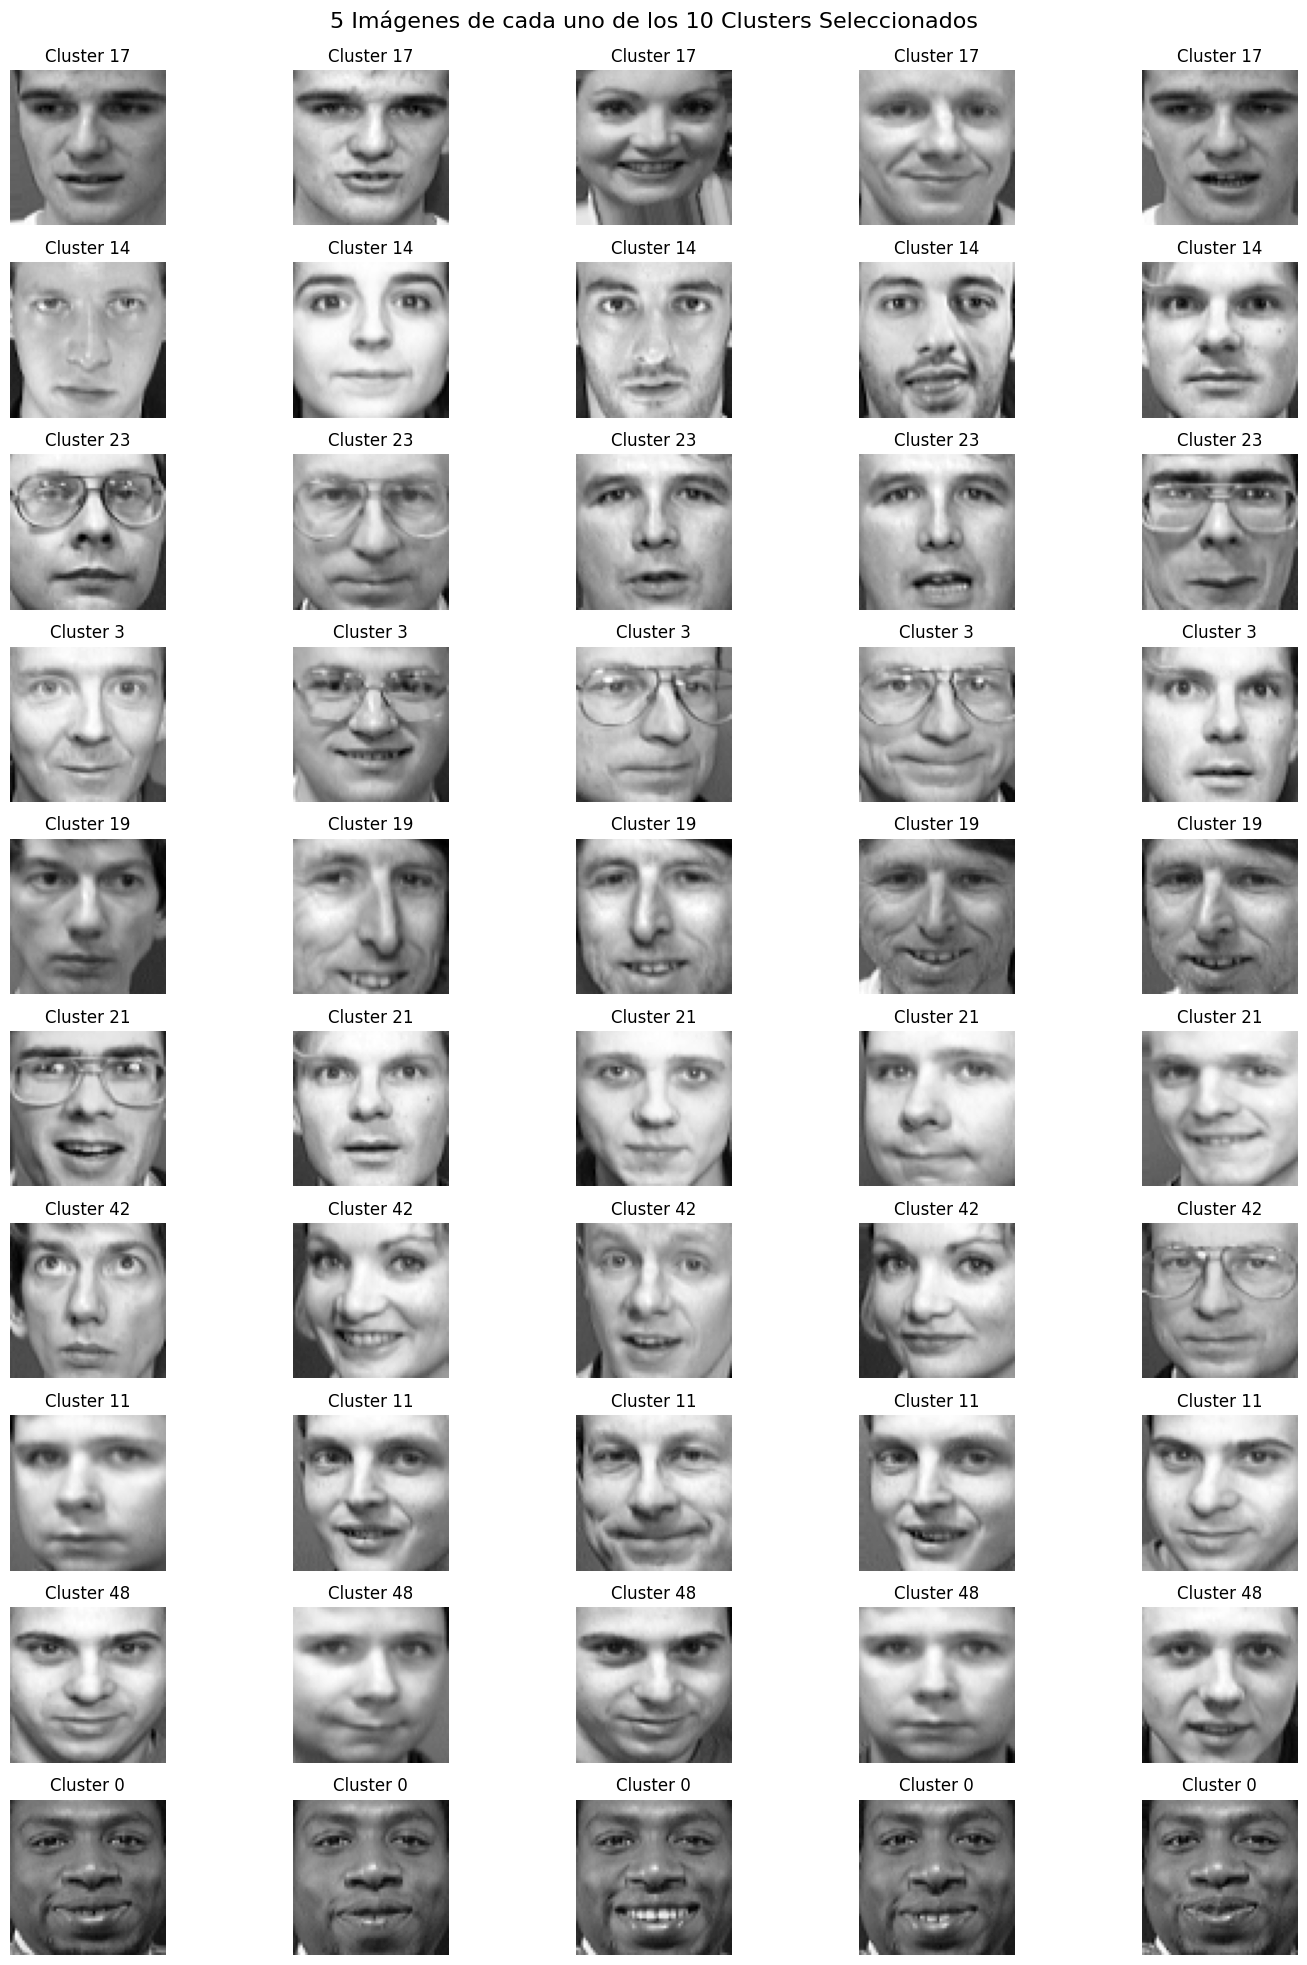

In [31]:
# Notebook 3: Extraer y Visualizar Imágenes de al Menos 10 Clusters

# Importar librerías necesarias
import matplotlib.pyplot as plt

# Seleccionar imágenes de al menos 10 clusters
selected_clusters = faces_df['cluster'].value_counts().head(10).index
fig, axes = plt.subplots(10, 5, figsize=(15, 20))
plt.suptitle("5 Imágenes de cada uno de los 10 Clusters Seleccionados", size=16)

# Iterar sobre los clusters seleccionados y mostrar imágenes de cada uno
for i, cluster in enumerate(selected_clusters):
    # Seleccionar 5 imágenes aleatorias del cluster
    cluster_images = faces_df[faces_df['cluster'] == cluster].sample(5, random_state=0)
    for j, img_index in enumerate(cluster_images.index):
        axes[i, j].imshow(olivetti_faces.images[img_index], cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(f"Cluster {cluster}")

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()



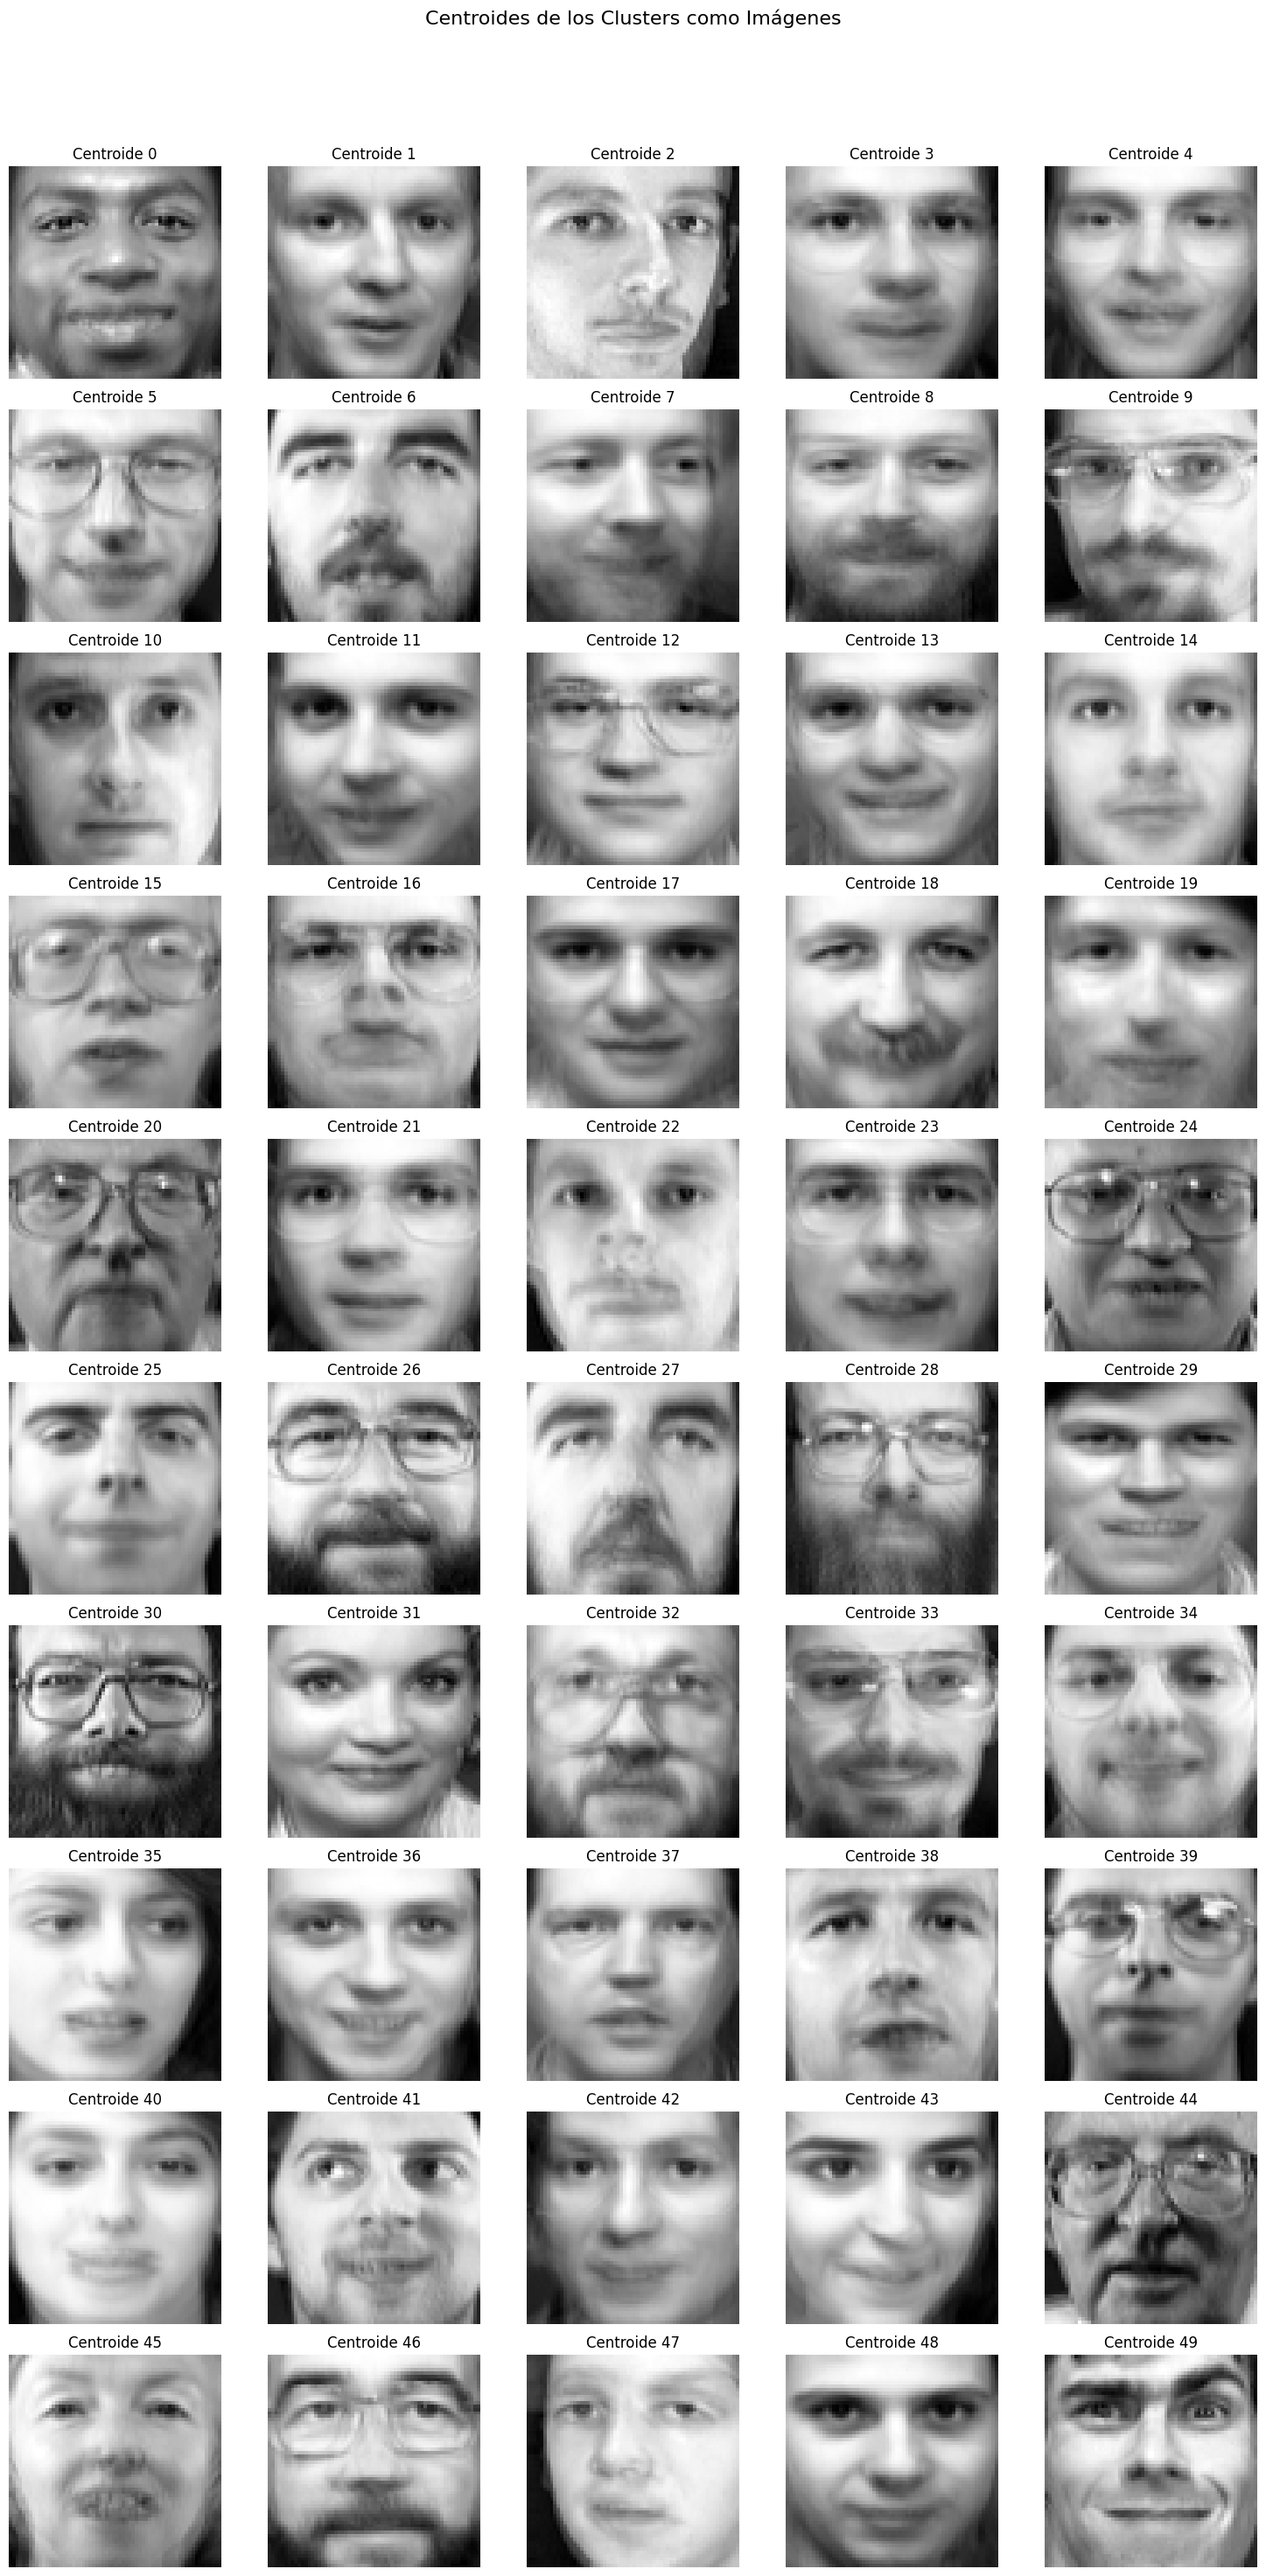

In [33]:
# Notebook 4: Visualizar Todos los Centroides como Imágenes

# Importar librerías necesarias
import matplotlib.pyplot as plt

# Obtener los centroides del modelo K-means
centroids = kmeans_optimal.cluster_centers_

# Calcular el número de filas y columnas necesarias para los subplots
num_rows = int(np.ceil(optimal_k / 5))  # Calcular el número de filas necesario
num_cols = 5 # Número de columnas


# Visualizar los centroides como imágenes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Ajustar el tamaño de la figura
plt.suptitle("Centroides de los Clusters como Imágenes", size=16)

# Iterar sobre los centroides y mostrarlos como imágenes
for i in range(optimal_k):
    centroid_image = centroids[i].reshape(64, 64)  # Reshape de 4096 a 64x64
    row, col = divmod(i, num_cols)  # Asegurarse que se usen las dimensiones correctas
    axes[row, col].imshow(centroid_image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Centroide {i}")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()